In [1]:
import numpy as np

data = np.loadtxt("DataSets\data.csv", delimiter = ",")

In [8]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

In [9]:
x.shape

(100, 1)

#### Training and testing

In [10]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)

##### Import Algorithm

In [14]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X_train, Y_train)

LinearRegression()

##### Getting Coefficients

In [17]:
m = alg1.coef_
b = alg1.intercept_
print(m, b)

[1.3233124] 8.720587207614756


##### Plotting

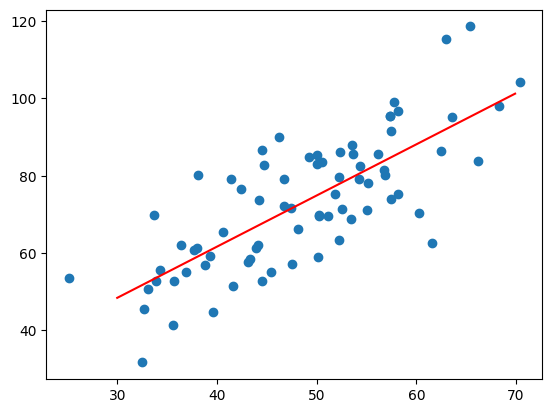

In [27]:
import matplotlib.pyplot as plt
m = alg1.coef_
b = alg1.intercept_

# Plot linear regression
x_line = np.arange(30,70,0.1)
y_line = m * x_line + b
plt.plot(x_line, y_line, "r")

# Plot data points
train_1d = X_train.reshape(75)
plt.scatter(X_train, Y_train)


plt.show()

##### Plot vs test data

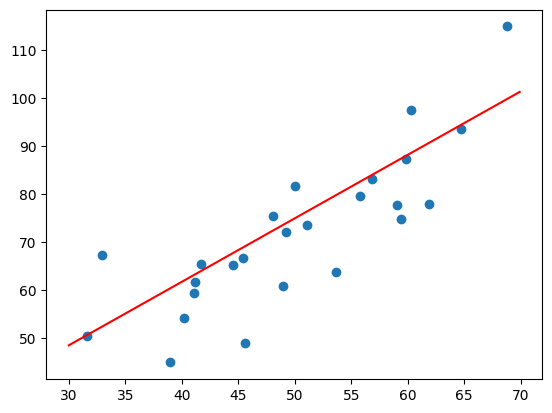

In [29]:
import matplotlib.pyplot as plt
m = alg1.coef_
b = alg1.intercept_

# Plot linear regression
x_line = np.arange(30,70,0.1)
y_line = m * x_line + b
plt.plot(x_line, y_line, "r")

# Plot data points
train_1d = X_test.reshape(25)
plt.scatter(X_test, Y_test)

plt.show()

### Find coefficient and intercept

For the given dataset "FuelEconomy.csv" Create a Linear Regressor and fit the dataset in this. After that, print the coefficient and intercept.
Note:
 1. Inside the function "train_test_split", use the "random_state = 42".
 2. Split the dataset in the ratio of 70:30 into the training and testing datasets.
To know more about randomstate please read the document given regarding randomstate.
Output
Print the coefficient and intercept in separate lines rounded off to 2 decimal places.

In [32]:
data = np.loadtxt('DataSets\FuelEconomy.csv', delimiter = ',')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

[-0.07]
38.84


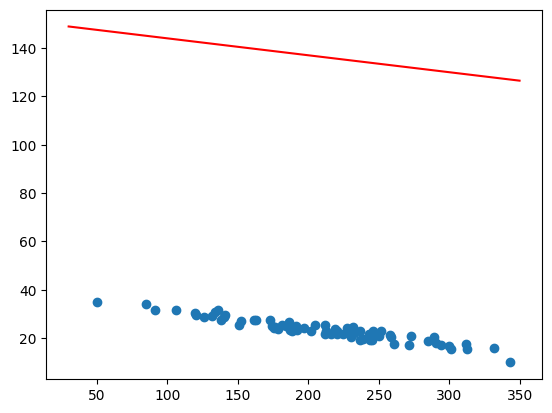

In [22]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load and reshape
data = np.loadtxt('DataSets\FuelEconomy.csv', delimiter = ',')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# Divide data into test and training data. Default is 75% training, 25% testing.
# random_state is the seed for the random number generator
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, train_size=0.7, random_state = 42)


alg1 = LinearRegression()
alg1.fit(X_train, Y_train)

m = np.round(alg1.coef_, 2)
c = np.round(alg1.intercept_, 2)
print(m)
print(c)

# Plot linear regression
x_line = np.arange(30,350,0.1)
y_line = m * x_line + b
plt.plot(x_line, y_line, "r")

# Plot data points
train_1d = X_train.reshape(70)
plt.scatter(X_train, Y_train)

plt.show()


### Find the testing and training score

For the given dataset "FuelEconomy.csv" Create a Linear Regressor and fit the dataset in this and then print the training and testing score for this regressor.
Note: Inside the function "traintestsplit" use the "random_state = 42".
To know more about randomstate please read the document given regarding randomstate.

In [40]:
score_test = alg1.score(X_test, Y_test)
score_training = alg1.score(X_train, Y_train)
score_test, score_training

(0.9133154290618397, 0.90632020565186)

In [42]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load and reshape
data = np.loadtxt('DataSets\FuelEconomy.csv', delimiter = ',')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

# Divide data into test and training data. Default is 75% training, 25% testing.
# random_state is the seed for the random number generator
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, train_size = 0.7, random_state = 42)


alg1 = LinearRegression()
alg1.fit(X_train, Y_train)

score_test = alg1.score(X_test, Y_test)
score_training = alg1.score(X_train, Y_train)
print(np.round(score_test, 3))
print(np.round(score_training, 3))

0.913
0.906


##### Linear regression from scratch

For the given dataset "FuelEconomy.csv"
You need to write four functions namely:
1. fit(x_train, y_train)
2. predict(x, m, c)
3. score(y_truth, y_pred)
4. cost(x, y, m, c)
The output is going to print the training and testing score and the cost of the regressor trained using the fit function

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split

data = np.loadtxt('DataSets\FuelEconomy.csv', delimiter=',')
X = data[:, 0]
y = data[:, 1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

###########################
##### Start from here #####
###########################

def fit(x_train, y_train):
    ## Write code for fit function
    num = (x_train*y_train).mean() -x_train.mean() * y_train.mean()
    den = (x_train**2).mean() -x_train.mean()**2
    m =num/den
    c = y_train.mean() -m * x_train.mean()
    return m,c

def predict(x, m, c):
    ## Write code for predict function
    return m*x + c
    

def score(y_truth, y_pred):
    ## Write code for score function
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth-y_truth.mean())**2).sum()
    return 1-u/v
    


def cost(x, y, m, c):
    ## Write code for cost function
    return ((y-m*x-c)**2).mean()


###########################
###########################

m, c = fit(X_train, Y_train)

y_test_pred = predict(X_test, m, c)
y_train_pred = predict(X_train, m, c)

print(round(score(Y_test, y_test_pred), 2))
print(round(score(Y_train, y_train_pred), 2))
print(round(cost(X_train,Y_train, m, c ), 2))

0.91
0.91
2.12


In [ ]:

def fit(x_train, y_train):
    ## Write code for fit function
    num = np.mean(x_train * y_train) - (np.mean(x_train) * np.mean(y_train))
    den = np.mean(x_train**2) - np.mean(x_train)**2
    m = num / den
    c = np.mean(y_train) - m * np.mean(x_train)
    return (m, c)

def fit(x_train, y_train):
    ## Write code for fit function
    num = (x_train*y_train).mean() -x_train.mean() * y_train.mean()
    den = (x_train**2).mean() -x_train.mean()**2
    m =num/den
    c = y_train.mean() -m * x_train.mean()
    return m,c


def predict(x, m, c):
    ## Write code for predict function
    y = m*x + c
    return (y)

def predict(x, m, c):
    ## Write code for predict function
    return m*x + c

def score(y_truth, y_pred):
    ## Write code for score function
    u = np.sum((y_truth - y_pred)**2)
    y_truth_mean = np.mean(y_truth)
    v = np.sum((y_truth - y_truth_mean)**2)
    s = 1 - u/v
    return(s)
    
def score(y_truth, y_pred):
    ## Write code for score function
    u = ((y_truth - y_pred)**2).sum()
    v = ((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

def cost(x, y, m, c):
    ## Write code for cost function
    c = np.sum((y -(m * x - c) )**2)
    return(c)

def cost(x, y, m, c):
    ## Write code for cost function
    return ((y-m*x-c)**2).mean()

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split

data = np.loadtxt('DataSets\FuelEconomy.csv', delimiter=',')
X = data[:, 0]
y = data[:, 1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

###########################
##### Start from here #####
###########################


def fit(x_train, y_train):
    ## Write code for fit function
    num = np.mean(x_train * y_train) - (np.mean(x_train) * np.mean(y_train))
    den = np.mean(x_train**2) - np.mean(x_train)**2
    m = num / den
    c = np.mean(y_train) - m * np.mean(x_train)
    return (m, c)


def predict(x, m, c):
    ## Write code for predict function
    y = m*x + c
    return (y)

def score(y_truth, y_pred):
    ## Write code for score function
    u = np.sum((y_truth - y_pred)**2)
    y_truth_mean = np.mean(y_truth)
    v = np.sum((y_truth - y_truth_mean)**2)
    s = 1 - u/v
    return(s)

def cost(x, y, m, c):
    ## Write code for cost function
    cost = np.mean((y -m * x - c )**2)
    return(cost)

###########################
###########################

m, c = fit(X_train, Y_train)

y_test_pred = predict(X_test, m, c)
y_train_pred = predict(X_train, m, c)

print(round(score(Y_test, y_test_pred), 2))
print(round(score(Y_train, y_train_pred), 2))
print(round(cost(X_train,Y_train, m, c ), 2))

0.91
0.91
2.12
